# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

## Downloading Packages and Loading Data

In [1]:
import sqlite3
import pandas as pd

In [2]:
con = sqlite3.connect('/Users/dandelion/Library/CloudStorage/OneDrive-RegisUniversity/MSHI/MSDS 600 Intro to Data Science/MSDS 600 NBC/W7- Natural Language Processing, Applications, Steps/cats_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,author,score,n_comments,text,link
0,Weekly Open Thread #3 - Discuss Anything About...,AutoModerator,11,35,*Welcome to th Weekly Open Thread!*\n\nAsk any...,/r/cats/comments/1fvxs83/weekly_open_thread_3_...
1,Friendly reminder to everyone:,Minifig81,33,9,Please be cautious when engaging with posts cl...,/r/cats/comments/1fugp7e/friendly_reminder_to_...
2,The cat ate my homework?,butterflywithbullets,12274,256,,/r/cats/comments/1fzw842/the_cat_ate_my_homework/
3,"Rest in peace Marbles, my sweet senior adoptee...",Kytothelee,8980,226,In loving memory of Marbles ❤️\n\n02-06-2008 -...,/r/cats/comments/1fzv2py/rest_in_peace_marbles...
4,Guess I'm a cat person now,LucyLuBird,16741,251,Brought this sweet guy home this week. His nam...,/r/cats/comments/1fzsblf/guess_im_a_cat_person...
...,...,...,...,...,...,...
782,Share your cuddly cats,Toddric29,11,5,,/r/cats/comments/1fzbnyf/share_your_cuddly_cats/
783,Cat meeting kitten advice,Agreeable-Bad4156,2,0,Hoping to get some advice. Going to any ave I ...,/r/cats/comments/1fzpdez/cat_meeting_kitten_ad...
784,Head twitch + itchy face?,Certain-Music49,3,0,My little boy is 13(ish) and is being treated ...,/r/cats/comments/1fzj1p6/head_twitch_itchy_face/
785,My cat clover,Character_Play_758,16,2,,/r/cats/comments/1fz9sul/my_cat_clover/


## Extacting Sentiment Scores

### Python Sentiment (Textblob)

In [31]:
#conda install -c conda-forge textblob vadersentiment -y

In [32]:
from textblob import TextBlob

<Axes: ylabel='Frequency'>

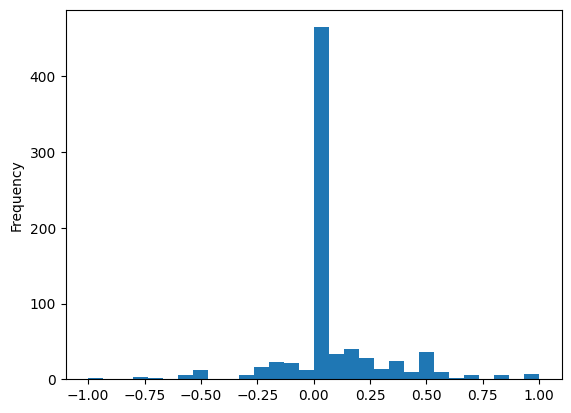

In [33]:
#Python package sentiment for the cats dataset
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title'].apply(get_tb_sentiment)

#Looking at the histogram
df['tb_sentiment'].plot.hist(bins=30) 

In [34]:
# Average mean and median 
tb_mean = df['tb_sentiment'].mean()
tb_median = df['tb_sentiment'].median()

print("TextBlob mean is:", tb_mean, "TextBlob median is:", tb_median)


TextBlob mean is: 0.057181411669181684 TextBlob median is: 0.0


### Keyword Sentiment

In [35]:
#Loading the AFINN file
sentiment_df = pd.read_csv('/Users/dandelion/Library/CloudStorage/OneDrive-RegisUniversity/MSHI/MSDS 600 Intro to Data Science/MSDS 600 NBC/W8- Social Media Data Collection/AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [36]:
# Converting into a dictionary
sentiment_dict = sentiment_df.to_dict()['score']
sentiment_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [37]:
# Getting the average sentiment for each title 
import numpy as np 

title_sentiments = [] # Empty list to hold all sentiments of each title in order 
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = [] # Empty list to hold sentiments for each word in the title 
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments)) #Adding the average of the sentiment value for the collection of words 

<Axes: ylabel='Frequency'>

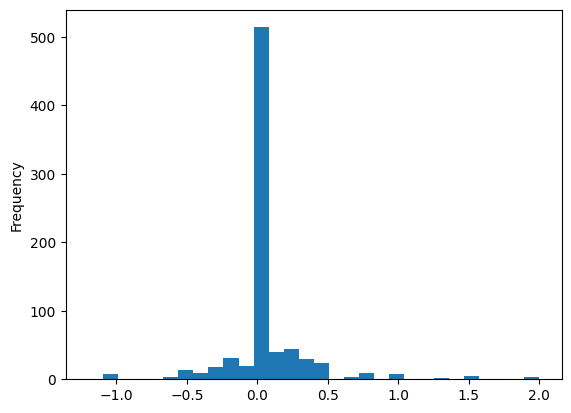

In [38]:
#Looking at a histogram of keyword sentiments
df['keyword_sentiment'] = title_sentiments
df['keyword_sentiment'].plot.hist(bins=30)

In [39]:
# Keyword sentiment mean and median 
kw_mean = df['keyword_sentiment'].mean()
kw_median = df['keyword_sentiment'].median()

print("Keyword mean is:", kw_mean, "Keyword median is:", kw_median)


#The average sentiment is a little more than zero, generally positive; There were many titles at zero because they didn't have the keywords in there 

Keyword mean is: 0.050245262608226336 Keyword median is: 0.0


In [40]:
#Most Negative Titles and Positive Titles by sorting 
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
700,The victim and the criminal,-1.200000
151,What hell is wrong with them?,-1.000000
563,Missing vertebrae,-1.000000
7,Foster Fail,-1.000000
682,Angry loaf 😾,-1.000000
...,...,...
381,Love him,1.500000
159,My funny friend,1.666667
320,Comfort,2.000000
374,Perfect fit,2.000000


Examining text for lowest and highest sentiment scores

In [41]:
# Grabbing the top 10 negative titles
Top_10_Neg = df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

# Grabbing the top 10 positive titles
Top_10_Pos = df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

# Printing the results
print("Top 10 Negative Titles:")
print(Top_10_Neg)

print("\nTop 10 Positive Titles:")
print(Top_10_Pos)


Top 10 Negative Titles:
['The victim and the criminal ', 'What hell is wrong with them?', 'Missing vertebrae', 'Foster Fail', 'Angry loaf 😾', 'he is mad', 'he scream', 'crazy angle', 'This motherfucker just ate my bacon ', 'Struggling for names']

Top 10 Positive Titles:
['Perfect fit ', 'Comfort', 'Help', 'My funny friend ', 'Love Triangle', 'Perfect Duo', 'Love him', 'Best Buds', 'Lovely beauties~🥰', 'Wonderful morning meeting!']


# Summary

Data from the cats subreddit was loaded. Then the sentiment scores of the titles of the posts was extracted using textblob python package and keyword sentiments. A histogram, mean and median for both sentiments were ploted. Both histograms show a concentration around 0, indicating that a large number of titles were neutral sentiments and or did not include words from the dictionary. The textblob sentiment mean was 0.057 and the keyword sentiment mean was very similar at a mean of 0.050. Both mean values are very close to 0, but still slighly positive. Textblob has a slightly higher mean which may mean textblob had more vocabulary that was detected in each title. 

This project could be used to monitor sentiment trends like engagement to help identify which types of posts gain more positive interactions between responders. I could see this being useful for content creators or even YouTube Algorithms when deciding which posts/videos to recommend to others. 